In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

**Read in Data**

In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')

In [3]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


**Check for null values and inspect the data**

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

**Feature Engineering**

In [8]:
df['blueTotalWardens'] = round((df['blueWardsPlaced'] + df['blueWardsDestroyed'] + df['blueAssists']), 2)
df['redTotalWardens'] = round((df['redWardsPlaced'] + df['redWardsDestroyed'] + df['redAssists']), 2)

set all 0's in death columns to 1 so we dont get an error when we divide

In [9]:
df.loc[df['redDeaths'] ==0] = 1

In [10]:
df.loc[df['blueDeaths'] ==0] =1

In [11]:
df['red_kda'] = round((df['redKills'] + df['redAssists']) / df['redDeaths'], 2)
df.fillna(0, inplace=True)

df['blue_kda'] = round((df['blueKills'] + df['blueAssists']) / df['blueDeaths'], 2)

In [12]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.438589e+09,0.505517,21.988562,2.803826,0.511185,6.155279,6.112866,6.613422,0.556129,0.370888,...,214.215305,50.578702,-11.535884,33.244762,21.433829,1628.082174,31.378480,31.373520,2.855013,2.837323
std,5.231931e+08,0.499995,18.065805,2.177621,0.499900,3.021717,2.940683,4.070927,0.623056,0.483067,...,33.169790,11.545874,2412.341933,1890.344004,3.238635,241.197930,19.045182,19.400615,2.922848,2.854489
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,-11467.000000,-8348.000000,1.000000,1.000000,1.000000,1.000000,0.080000,0.070000
25%,4.481379e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,203.000000,44.000000,-1549.000000,-1179.000000,20.300000,1541.000000,22.000000,22.000000,1.245000,1.220000
50%,4.510667e+09,1.000000,16.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,218.000000,51.000000,1.000000,3.000000,21.800000,1636.000000,26.000000,26.000000,2.000000,2.000000
75%,4.521659e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,232.000000,57.000000,1545.000000,1261.000000,23.200000,1741.000000,33.000000,33.000000,3.400000,3.400000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,266.000000,287.000000,35.000000,40.000000


**Set predictors and target variables**

In [13]:
X = df.drop(columns=['blueWins', 'gameId'])
y = df['blueWins']

**Split data into train, validation, and test sets**

In [14]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.20, random_state=42)

**Scale the data using a standard scaler**

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
0,0.072289,0.125000,1.0,0.428571,0.285714,0.344828,0.5,1.0,0.0,0.000000,...,0.729537,0.615385,0.390115,0.463600,0.720588,0.750462,0.116981,0.087413,0.032073,0.069872
1,0.076305,0.083333,0.0,0.333333,0.523810,0.241379,1.0,1.0,1.0,0.000000,...,0.790036,0.362637,0.559853,0.484568,0.783088,0.861544,0.105660,0.122378,0.090779,0.029552
2,0.052209,0.208333,0.0,0.761905,0.238095,0.586207,0.5,1.0,0.0,0.333333,...,0.626335,0.428571,0.123290,0.112675,0.613971,0.693205,0.132075,0.090909,0.021191,0.140245
3,0.220884,0.208333,1.0,0.238095,0.000000,0.206897,0.0,0.0,0.0,0.000000,...,0.793594,0.835165,0.300197,0.379845,0.786765,0.640393,0.249057,0.052448,0.007159,0.298773
4,0.072289,0.250000,1.0,0.142857,0.095238,0.068966,0.5,1.0,0.0,0.000000,...,0.843416,0.428571,0.413743,0.353575,0.838235,0.662002,0.098113,0.090909,0.040664,0.048335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,0.064257,0.041667,1.0,0.285714,0.142857,0.206897,0.0,0.0,0.0,0.000000,...,0.786477,0.571429,0.375726,0.437331,0.779412,0.664730,0.086792,0.055944,0.030355,0.079639
6318,0.076305,0.166667,1.0,0.142857,0.238095,0.103448,0.0,0.0,0.0,0.000000,...,0.793594,0.582418,0.480588,0.523030,0.786765,0.688804,0.098113,0.097902,0.069301,0.027548
6319,0.060241,0.125000,0.0,0.000000,0.142857,0.068966,0.5,0.0,1.0,0.000000,...,0.854093,0.571429,0.516080,0.530981,0.849265,0.693645,0.075472,0.080420,0.226804,0.017030
6320,0.060241,0.125000,1.0,0.238095,0.285714,0.344828,0.0,0.0,0.0,0.000000,...,0.733096,0.505495,0.489221,0.515726,0.724265,0.745885,0.105660,0.087413,0.054983,0.055597


In [22]:
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns= X_val.columns)
X_val_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
0,0.056225,0.041667,0.0,0.142857,0.238095,0.068966,0.5,1.0,0.0,0.0,...,0.807829,0.549451,0.505276,0.443103,0.801471,0.720051,0.064151,0.080420,0.090779,0.023291
1,0.212851,0.166667,0.0,0.095238,0.190476,0.068966,0.5,1.0,0.0,0.0,...,0.911032,0.604396,0.536780,0.502179,0.908088,0.760276,0.222642,0.080420,0.102806,0.023291
2,0.064257,0.166667,0.0,0.333333,0.285714,0.379310,0.0,0.0,0.0,0.0,...,0.722420,0.593407,0.512899,0.515844,0.713235,0.770839,0.116981,0.090909,0.033505,0.066116
3,0.048193,0.125000,0.0,0.285714,0.190476,0.068966,0.5,1.0,0.0,0.0,...,0.629893,0.428571,0.344575,0.298622,0.617647,0.663894,0.064151,0.087413,0.046678,0.043326
4,0.080321,0.166667,0.0,0.476190,0.095238,0.482759,0.5,1.0,0.0,0.0,...,0.807829,0.593407,0.317665,0.382495,0.801471,0.686471,0.143396,0.094406,0.016037,0.206862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.060241,0.250000,0.0,0.428571,0.238095,0.586207,0.5,0.0,1.0,0.0,...,0.740214,0.472527,0.366840,0.434739,0.731618,0.710237,0.143396,0.132867,0.032073,0.110944
1577,0.048193,0.041667,0.0,0.000000,0.285714,0.034483,0.5,0.0,1.0,0.0,...,0.779359,0.505495,0.602413,0.613794,0.772059,0.734354,0.052830,0.083916,0.398625,0.005510
1578,0.080321,0.250000,0.0,0.285714,0.142857,0.379310,0.0,0.0,0.0,0.0,...,0.814947,0.604396,0.372697,0.453999,0.808824,0.678065,0.139623,0.199301,0.026346,0.110944
1579,0.068273,0.083333,0.0,0.142857,0.238095,0.000000,0.0,0.0,0.0,0.0,...,0.875445,0.604396,0.590195,0.523148,0.871324,0.771499,0.071698,0.125874,0.119416,0.015026


In [25]:

rf = RandomForestClassifier(n_estimators=550,min_samples_leaf=0.31,random_state=42)
rf.fit(X_train_scaled,y_train)

pred_rf_train = rf.predict(X_train_scaled)
pred_rf_val = rf.predict(X_val_scaled)

print(accuracy_score(y_train, pred_rf_train))
print(accuracy_score(y_val, pred_rf_val))

0.7216070863650743
0.7387729285262492


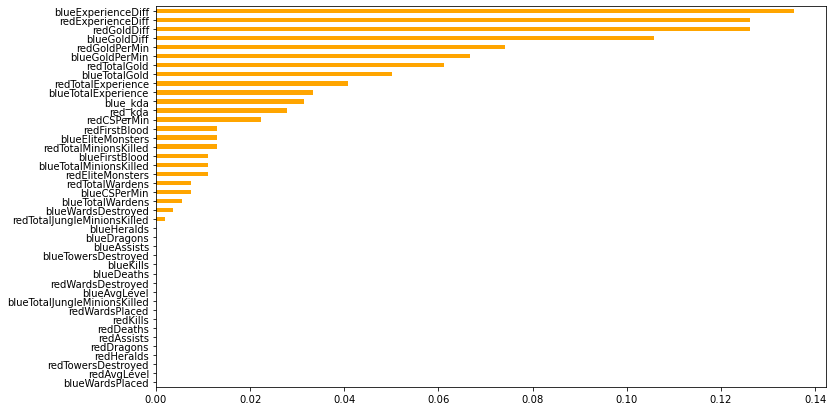

In [26]:
plt.figure(figsize=(12,7))
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="orange")
plt.show()

In [27]:
important_features = ['red_kda',
 'blue_kda',
 #'blueGoldDiff',
 #'redGoldDiff',
 #'blueExperienceDiff',
 #'redExperienceDiff',
 #'blueGoldPerMin',
 #'blueTotalGold',
 #'redGoldPerMin',
 #'redTotalGold',
 'redTotalExperience',
 'blueTotalExperience',
 'blueAvgLevel',
 'redKills',
 'blueDeaths',
 'redAvgLevel',
 'blueKills',
 'redDeaths',
 'blueAssists',
 'redAssists',
 'blueEliteMonsters',
  #new                    
 'blueTotalWardens',
 'redTotalWardens', 
 #'redGoldExperience', 
 #'blueGoldExperience',
 #'redGolds',
 #'blueGolds'
                     
                     ]


In [28]:
X_train_best_features = X_train_scaled_df[important_features]
X_val_best_features = X_val_scaled_df[important_features]
print(X_train_best_features.shape,X_val_best_features.shape)
print(y_train.shape,y_val.shape)

(6322, 15) (1581, 15)
(6322,) (1581,)


In [29]:
tree = DecisionTreeClassifier(max_depth =5, random_state = 42)
tree.fit(X_train_best_features, y_train)

pred_tree_train = tree.predict(X_train_best_features)
pred_tree_val = tree.predict(X_val_best_features)

print(accuracy_score(y_train, pred_tree_train))
print(accuracy_score(y_val, pred_tree_val))

0.7288832647896235
0.7058823529411765


In [30]:
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [31]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [32]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=0.31,
                                              n_estimators=550,
                                              random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [ ]:
best_model = rf_gs.best_estimator_

In [ ]:
best_model.fit(X_train_scaled, y_train)

   
train_preds = best_model.predict(X_train_scaled)
val_preds = best_model.predict(X_val_scaled)


print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_val, val_preds))

In [ ]:
plot_confusion_matrix(best_model, X_test_scaled, y_test)

max_depth , min_child_weight and gamma .

In [ ]:
clf = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 booster='gbtree',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# Fit XGBClassifier
clf.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
'''
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3,6,10],
    'min_child_weight': [.5,2,5],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [100, 500, 1000],
    'gamma': [.1, .5, 1]
}
'''

In [ ]:
boost_param_grid = {
    'learning_rate': [0.2],
    'max_depth': [3,10],
    'min_child_weight': [.5,5],
    'subsample': [0.5, 0.9],
    'n_estimators': [100, 1000],
    'gamma': [.1, 1]
}

In [ ]:
grid_clf = GridSearchCV(clf, boost_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_clf.fit(X_train_best_features, y_train)

best_parameters = grid_clf.best_params_
print(best_parameters)
#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))



In [ ]:

training_preds = grid_clf.predict(X_train_best_features)
test_preds = grid_clf.predict(X_test_best_features)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

**SVM**

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

In [ ]:
for model in models:
    train_preds = model.predict(X_train)
    print(train_preds.shape)
    test_preds = model.predict(X_test)
    print(test_preds.shape)
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('test accuracy: ', accuracy_score(y_test, test_preds))
    print()

In [ ]:
SVM = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
SVM.fit(X_train_best_features, y_train)
train_preds = SVM.predict(X_train_best_features)
test_preds = SVM.predict(X_test_best_features)
print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('test accuracy: ', accuracy_score(y_test, test_preds))

Bayesion

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
bayes = CategoricalNB()
bayes.fit(X_train_best_features, y_train)
train_preds = bayes.predict(X_train_best_features)
test_preds = bayes.predict(X_test_best_features)
print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('test accuracy: ', accuracy_score(y_test, test_preds))

In [ ]:
plot_confusion_matrix(bayes, X_test, y_test);

**Logistic Regression Probabilities**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_best_features, y_train)
preds = logreg.predict(X_test_best_features)
probs = logreg.predict_proba(X_train_best_features)

#for label, prob in zip(preds, probs):
#print(label, prob)


In [ ]:

for label, coef in zip(X_train_best_features.columns, abs(logreg.coef_[0])):
    print(label, coef)
    

In [ ]:
x = list(logreg.coef_)
x[0]

In [ ]:
fig, ax = plt.subplots()
ax.bar(X_train_best_features.columns, abs(logreg.coef_[0]))

In [ ]:

ax = sns.regplot(x='blueKills', y='blueWins', data=df, logistic=True)

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
pr = ProfileReport(df, title='Video Games Profile Report')


# Second Part

In [34]:
data = pd.read_csv('../../../high_diamond_ranked_10min.csv')
data.drop(columns=["gameId"], inplace=True)

data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [36]:
data.value_counts("blueWins")

blueWins
0    4949
1    4930
dtype: int64

In [37]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)

In [38]:
data["blue_KDA"].sort_values()

5424    0.0
6417    0.0
2416    0.0
3248    0.0
8285    0.0
       ... 
2190    inf
4376    inf
3920    inf
9258    inf
8844    inf
Name: blue_KDA, Length: 9879, dtype: float64

In [39]:
data.fillna(0)['blue_KDA'].sort_values()

5424    0.0
6417    0.0
2416    0.0
3248    0.0
8285    0.0
       ... 
2190    inf
4376    inf
3920    inf
9258    inf
8844    inf
Name: blue_KDA, Length: 9879, dtype: float64

In [40]:
data['blue_KDA'][data['blue_KDA'] == np.inf] = 0 
data['red_KDA'][data['red_KDA'] == np.inf] = 0 

<ipython-input-40-219225c9a3f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blue_KDA'][data['blue_KDA'] == np.inf] = 0
<ipython-input-40-219225c9a3f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_KDA'][data['red_KDA'] == np.inf] = 0


In [41]:
data['blue_KDA'].sort_values()

9582     0.0
9634     0.0
5523     0.0
4998     0.0
7019     0.0
        ... 
2072    29.0
1101    31.0
8133    31.0
9410    36.0
1384    40.0
Name: blue_KDA, Length: 9879, dtype: float64

In [42]:
data["blue_KDA"] = data.fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
data["red_KDA"] = data.fillna(0)

In [43]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
#data["blue_KDA"] = data["blue_KDA"].fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
#data["red_KDA"] = data["red_KDA"].fillna(0)


In [44]:
#data.loc[data['redDeaths'] ==0] = round(data["blueKills"] + data["blueAssists"])


#data['blue_KDA'] = data[['blueAssists','blueKills']].sum(axis=1).where(data['blueDeaths'] == np.inf, 0)

In [45]:
for idx, x in enumerate(data['blue_KDA']):
    print(idx,x)
    print('type: ', type(x))
    print()
    if np.isinf(x):
        data['blue_KDA'][idx] = round(data["blueKills"][idx] + data["blueAssists"][idx])

0 3.33
type:  <class 'float'>

1 2.0
type:  <class 'float'>

2 1.0
type:  <class 'float'>

3 1.8
type:  <class 'float'>

4 2.0
type:  <class 'float'>

5 3.67
type:  <class 'float'>

6 2.33
type:  <class 'float'>

7 0.62
type:  <class 'float'>

8 2.14
type:  <class 'float'>

9 1.8
type:  <class 'float'>

10 2.5
type:  <class 'float'>

11 1.64
type:  <class 'float'>

12 18.0
type:  <class 'float'>

13 0.56
type:  <class 'float'>

14 2.0
type:  <class 'float'>

15 0.86
type:  <class 'float'>

16 9.0
type:  <class 'float'>

17 0.86
type:  <class 'float'>

18 4.0
type:  <class 'float'>

19 1.11
type:  <class 'float'>

20 4.33
type:  <class 'float'>

21 0.69
type:  <class 'float'>

22 1.17
type:  <class 'float'>

23 2.67
type:  <class 'float'>

24 1.78
type:  <class 'float'>

25 1.0
type:  <class 'float'>

26 2.83
type:  <class 'float'>

27 4.0
type:  <class 'float'>

28 3.5
type:  <class 'float'>

29 0.62
type:  <class 'float'>

30 4.75
type:  <class 'float'>

31 5.5
type:  <class 'float'>


<ipython-input-45-f14c606cf878>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blue_KDA'][idx] = round(data["blueKills"][idx] + data["blueAssists"][idx])


 <class 'float'>

485 1.86
type:  <class 'float'>

486 2.57
type:  <class 'float'>

487 1.75
type:  <class 'float'>

488 6.5
type:  <class 'float'>

489 3.25
type:  <class 'float'>

490 6.0
type:  <class 'float'>

491 2.75
type:  <class 'float'>

492 1.8
type:  <class 'float'>

493 2.86
type:  <class 'float'>

494 2.1
type:  <class 'float'>

495 4.25
type:  <class 'float'>

496 2.5
type:  <class 'float'>

497 6.75
type:  <class 'float'>

498 3.33
type:  <class 'float'>

499 2.83
type:  <class 'float'>

500 3.5
type:  <class 'float'>

501 3.75
type:  <class 'float'>

502 6.33
type:  <class 'float'>

503 0.67
type:  <class 'float'>

504 1.6
type:  <class 'float'>

505 0.57
type:  <class 'float'>

506 5.67
type:  <class 'float'>

507 0.6
type:  <class 'float'>

508 4.25
type:  <class 'float'>

509 3.67
type:  <class 'float'>

510 2.2
type:  <class 'float'>

511 2.17
type:  <class 'float'>

512 1.71
type:  <class 'float'>

513 2.0
type:  <class 'float'>

514 20.0
type:  <class 'float'>

51

961 2.5
type:  <class 'float'>

962 3.33
type:  <class 'float'>

963 0.89
type:  <class 'float'>

964 4.67
type:  <class 'float'>

965 1.5
type:  <class 'float'>

966 1.12
type:  <class 'float'>

967 1.62
type:  <class 'float'>

968 1.0
type:  <class 'float'>

969 0.33
type:  <class 'float'>

970 2.14
type:  <class 'float'>

971 2.0
type:  <class 'float'>

972 2.5
type:  <class 'float'>

973 0.17
type:  <class 'float'>

974 1.25
type:  <class 'float'>

975 2.5
type:  <class 'float'>

976 0.15
type:  <class 'float'>

977 7.25
type:  <class 'float'>

978 0.45
type:  <class 'float'>

979 6.0
type:  <class 'float'>

980 3.6
type:  <class 'float'>

981 0.4
type:  <class 'float'>

982 1.5
type:  <class 'float'>

983 1.0
type:  <class 'float'>

984 4.83
type:  <class 'float'>

985 8.0
type:  <class 'float'>

986 0.62
type:  <class 'float'>

987 2.0
type:  <class 'float'>

988 inf
type:  <class 'float'>

989 0.71
type:  <class 'float'>

990 7.0
type:  <class 'float'>

991 1.25
type:  <class 'f

1407 0.43
type:  <class 'float'>

1408 2.6
type:  <class 'float'>

1409 1.62
type:  <class 'float'>

1410 0.42
type:  <class 'float'>

1411 1.0
type:  <class 'float'>

1412 0.44
type:  <class 'float'>

1413 0.5
type:  <class 'float'>

1414 1.67
type:  <class 'float'>

1415 1.23
type:  <class 'float'>

1416 1.08
type:  <class 'float'>

1417 1.5
type:  <class 'float'>

1418 2.71
type:  <class 'float'>

1419 2.5
type:  <class 'float'>

1420 1.71
type:  <class 'float'>

1421 0.62
type:  <class 'float'>

1422 8.67
type:  <class 'float'>

1423 4.5
type:  <class 'float'>

1424 2.25
type:  <class 'float'>

1425 6.67
type:  <class 'float'>

1426 1.64
type:  <class 'float'>

1427 2.3
type:  <class 'float'>

1428 1.83
type:  <class 'float'>

1429 2.75
type:  <class 'float'>

1430 5.0
type:  <class 'float'>

1431 5.5
type:  <class 'float'>

1432 4.0
type:  <class 'float'>

1433 2.67
type:  <class 'float'>

1434 2.67
type:  <class 'float'>

1435 3.75
type:  <class 'float'>

1436 0.43
type:  <class 

type:  <class 'float'>

1927 0.5
type:  <class 'float'>

1928 2.8
type:  <class 'float'>

1929 0.64
type:  <class 'float'>

1930 3.33
type:  <class 'float'>

1931 1.36
type:  <class 'float'>

1932 1.38
type:  <class 'float'>

1933 0.62
type:  <class 'float'>

1934 2.4
type:  <class 'float'>

1935 4.0
type:  <class 'float'>

1936 1.25
type:  <class 'float'>

1937 1.38
type:  <class 'float'>

1938 2.0
type:  <class 'float'>

1939 1.18
type:  <class 'float'>

1940 2.43
type:  <class 'float'>

1941 3.33
type:  <class 'float'>

1942 1.44
type:  <class 'float'>

1943 5.33
type:  <class 'float'>

1944 2.0
type:  <class 'float'>

1945 0.33
type:  <class 'float'>

1946 4.33
type:  <class 'float'>

1947 3.75
type:  <class 'float'>

1948 3.0
type:  <class 'float'>

1949 3.67
type:  <class 'float'>

1950 4.0
type:  <class 'float'>

1951 0.75
type:  <class 'float'>

1952 6.5
type:  <class 'float'>

1953 4.0
type:  <class 'float'>

1954 1.25
type:  <class 'float'>

1955 3.8
type:  <class 'float'>

1

2593 1.4
type:  <class 'float'>

2594 7.5
type:  <class 'float'>

2595 0.79
type:  <class 'float'>

2596 1.86
type:  <class 'float'>

2597 0.9
type:  <class 'float'>

2598 1.6
type:  <class 'float'>

2599 0.75
type:  <class 'float'>

2600 4.5
type:  <class 'float'>

2601 1.2
type:  <class 'float'>

2602 3.0
type:  <class 'float'>

2603 3.0
type:  <class 'float'>

2604 2.5
type:  <class 'float'>

2605 2.75
type:  <class 'float'>

2606 1.38
type:  <class 'float'>

2607 4.33
type:  <class 'float'>

2608 1.2
type:  <class 'float'>

2609 3.22
type:  <class 'float'>

2610 3.17
type:  <class 'float'>

2611 1.71
type:  <class 'float'>

2612 10.0
type:  <class 'float'>

2613 2.67
type:  <class 'float'>

2614 3.2
type:  <class 'float'>

2615 1.1
type:  <class 'float'>

2616 1.6
type:  <class 'float'>

2617 2.62
type:  <class 'float'>

2618 3.67
type:  <class 'float'>

2619 5.33
type:  <class 'float'>

2620 1.0
type:  <class 'float'>

2621 0.92
type:  <class 'float'>

2622 3.2
type:  <class 'floa

3273 7.0
type:  <class 'float'>

3274 3.0
type:  <class 'float'>

3275 0.83
type:  <class 'float'>

3276 1.3
type:  <class 'float'>

3277 1.14
type:  <class 'float'>

3278 4.5
type:  <class 'float'>

3279 2.0
type:  <class 'float'>

3280 4.11
type:  <class 'float'>

3281 6.2
type:  <class 'float'>

3282 4.17
type:  <class 'float'>

3283 inf
type:  <class 'float'>

3284 4.8
type:  <class 'float'>

3285 5.0
type:  <class 'float'>

3286 2.25
type:  <class 'float'>

3287 2.0
type:  <class 'float'>

3288 1.62
type:  <class 'float'>

3289 1.33
type:  <class 'float'>

3290 0.38
type:  <class 'float'>

3291 1.8
type:  <class 'float'>

3292 1.29
type:  <class 'float'>

3293 4.4
type:  <class 'float'>

3294 5.5
type:  <class 'float'>

3295 2.0
type:  <class 'float'>

3296 2.83
type:  <class 'float'>

3297 2.33
type:  <class 'float'>

3298 0.1
type:  <class 'float'>

3299 4.75
type:  <class 'float'>

3300 3.0
type:  <class 'float'>

3301 2.33
type:  <class 'float'>

3302 3.0
type:  <class 'float'

3969 0.67
type:  <class 'float'>

3970 1.33
type:  <class 'float'>

3971 3.25
type:  <class 'float'>

3972 0.33
type:  <class 'float'>

3973 2.2
type:  <class 'float'>

3974 0.38
type:  <class 'float'>

3975 1.38
type:  <class 'float'>

3976 1.0
type:  <class 'float'>

3977 2.6
type:  <class 'float'>

3978 3.6
type:  <class 'float'>

3979 1.5
type:  <class 'float'>

3980 0.5
type:  <class 'float'>

3981 4.57
type:  <class 'float'>

3982 1.18
type:  <class 'float'>

3983 2.0
type:  <class 'float'>

3984 2.25
type:  <class 'float'>

3985 0.5
type:  <class 'float'>

3986 1.71
type:  <class 'float'>

3987 1.14
type:  <class 'float'>

3988 5.0
type:  <class 'float'>

3989 7.67
type:  <class 'float'>

3990 8.5
type:  <class 'float'>

3991 0.54
type:  <class 'float'>

3992 3.0
type:  <class 'float'>

3993 3.0
type:  <class 'float'>

3994 3.0
type:  <class 'float'>

3995 1.14
type:  <class 'float'>

3996 1.43
type:  <class 'float'>

3997 2.0
type:  <class 'float'>

3998 0.75
type:  <class 'flo

4389 1.2
type:  <class 'float'>

4390 2.0
type:  <class 'float'>

4391 1.3
type:  <class 'float'>

4392 2.25
type:  <class 'float'>

4393 0.6
type:  <class 'float'>

4394 2.0
type:  <class 'float'>

4395 1.0
type:  <class 'float'>

4396 2.0
type:  <class 'float'>

4397 0.88
type:  <class 'float'>

4398 2.0
type:  <class 'float'>

4399 2.67
type:  <class 'float'>

4400 2.0
type:  <class 'float'>

4401 3.14
type:  <class 'float'>

4402 0.42
type:  <class 'float'>

4403 1.82
type:  <class 'float'>

4404 20.0
type:  <class 'float'>

4405 0.44
type:  <class 'float'>

4406 4.5
type:  <class 'float'>

4407 0.36
type:  <class 'float'>

4408 2.75
type:  <class 'float'>

4409 1.8
type:  <class 'float'>

4410 1.36
type:  <class 'float'>

4411 2.4
type:  <class 'float'>

4412 5.0
type:  <class 'float'>

4413 2.6
type:  <class 'float'>

4414 inf
type:  <class 'float'>

4415 2.5
type:  <class 'float'>

4416 1.44
type:  <class 'float'>

4417 0.0
type:  <class 'float'>

4418 0.33
type:  <class 'float'


4855 1.75
type:  <class 'float'>

4856 3.0
type:  <class 'float'>

4857 1.0
type:  <class 'float'>

4858 1.2
type:  <class 'float'>

4859 0.75
type:  <class 'float'>

4860 2.0
type:  <class 'float'>

4861 2.17
type:  <class 'float'>

4862 1.09
type:  <class 'float'>

4863 1.73
type:  <class 'float'>

4864 0.57
type:  <class 'float'>

4865 2.25
type:  <class 'float'>

4866 1.18
type:  <class 'float'>

4867 1.0
type:  <class 'float'>

4868 2.5
type:  <class 'float'>

4869 4.67
type:  <class 'float'>

4870 2.14
type:  <class 'float'>

4871 0.25
type:  <class 'float'>

4872 2.38
type:  <class 'float'>

4873 5.0
type:  <class 'float'>

4874 8.0
type:  <class 'float'>

4875 1.2
type:  <class 'float'>

4876 3.25
type:  <class 'float'>

4877 2.5
type:  <class 'float'>

4878 10.67
type:  <class 'float'>

4879 5.0
type:  <class 'float'>

4880 2.43
type:  <class 'float'>

4881 1.6
type:  <class 'float'>

4882 1.17
type:  <class 'float'>

4883 inf
type:  <class 'float'>

4884 1.71
type:  <class '

5406 7.33
type:  <class 'float'>

5407 2.4
type:  <class 'float'>

5408 3.6
type:  <class 'float'>

5409 3.86
type:  <class 'float'>

5410 1.8
type:  <class 'float'>

5411 9.5
type:  <class 'float'>

5412 2.55
type:  <class 'float'>

5413 0.78
type:  <class 'float'>

5414 1.57
type:  <class 'float'>

5415 2.57
type:  <class 'float'>

5416 2.4
type:  <class 'float'>

5417 1.0
type:  <class 'float'>

5418 1.2
type:  <class 'float'>

5419 1.2
type:  <class 'float'>

5420 1.17
type:  <class 'float'>

5421 5.33
type:  <class 'float'>

5422 1.62
type:  <class 'float'>

5423 2.71
type:  <class 'float'>

5424 0.0
type:  <class 'float'>

5425 2.0
type:  <class 'float'>

5426 2.6
type:  <class 'float'>

5427 1.12
type:  <class 'float'>

5428 2.5
type:  <class 'float'>

5429 5.0
type:  <class 'float'>

5430 3.8
type:  <class 'float'>

5431 2.0
type:  <class 'float'>

5432 2.08
type:  <class 'float'>

5433 2.33
type:  <class 'float'>

5434 2.43
type:  <class 'float'>

5435 2.67
type:  <class 'floa

6037 3.2
type:  <class 'float'>

6038 3.25
type:  <class 'float'>

6039 4.2
type:  <class 'float'>

6040 0.4
type:  <class 'float'>

6041 1.57
type:  <class 'float'>

6042 2.62
type:  <class 'float'>

6043 1.29
type:  <class 'float'>

6044 15.0
type:  <class 'float'>

6045 1.83
type:  <class 'float'>

6046 0.4
type:  <class 'float'>

6047 2.1
type:  <class 'float'>

6048 27.0
type:  <class 'float'>

6049 6.33
type:  <class 'float'>

6050 1.6
type:  <class 'float'>

6051 0.86
type:  <class 'float'>

6052 2.0
type:  <class 'float'>

6053 1.88
type:  <class 'float'>

6054 0.25
type:  <class 'float'>

6055 3.67
type:  <class 'float'>

6056 3.75
type:  <class 'float'>

6057 2.75
type:  <class 'float'>

6058 1.22
type:  <class 'float'>

6059 5.0
type:  <class 'float'>

6060 4.67
type:  <class 'float'>

6061 1.75
type:  <class 'float'>

6062 1.25
type:  <class 'float'>

6063 3.6
type:  <class 'float'>

6064 1.38
type:  <class 'float'>

6065 1.2
type:  <class 'float'>

6066 2.67
type:  <class 

6644 10.0
type:  <class 'float'>

6645 4.6
type:  <class 'float'>

6646 4.8
type:  <class 'float'>

6647 0.71
type:  <class 'float'>

6648 1.25
type:  <class 'float'>

6649 1.5
type:  <class 'float'>

6650 4.0
type:  <class 'float'>

6651 1.17
type:  <class 'float'>

6652 2.0
type:  <class 'float'>

6653 2.4
type:  <class 'float'>

6654 0.64
type:  <class 'float'>

6655 1.2
type:  <class 'float'>

6656 5.67
type:  <class 'float'>

6657 0.67
type:  <class 'float'>

6658 1.14
type:  <class 'float'>

6659 1.0
type:  <class 'float'>

6660 0.44
type:  <class 'float'>

6661 5.17
type:  <class 'float'>

6662 2.75
type:  <class 'float'>

6663 0.78
type:  <class 'float'>

6664 0.62
type:  <class 'float'>

6665 3.29
type:  <class 'float'>

6666 1.12
type:  <class 'float'>

6667 1.17
type:  <class 'float'>

6668 1.33
type:  <class 'float'>

6669 2.43
type:  <class 'float'>

6670 0.89
type:  <class 'float'>

6671 4.0
type:  <class 'float'>

6672 0.88
type:  <class 'float'>

6673 0.67
type:  <class

type:  <class 'float'>

7037 0.62
type:  <class 'float'>

7038 2.83
type:  <class 'float'>

7039 1.43
type:  <class 'float'>

7040 4.75
type:  <class 'float'>

7041 0.17
type:  <class 'float'>

7042 3.17
type:  <class 'float'>

7043 3.2
type:  <class 'float'>

7044 1.12
type:  <class 'float'>

7045 4.0
type:  <class 'float'>

7046 0.78
type:  <class 'float'>

7047 8.5
type:  <class 'float'>

7048 3.0
type:  <class 'float'>

7049 0.88
type:  <class 'float'>

7050 4.0
type:  <class 'float'>

7051 0.5
type:  <class 'float'>

7052 0.23
type:  <class 'float'>

7053 1.7
type:  <class 'float'>

7054 1.33
type:  <class 'float'>

7055 2.67
type:  <class 'float'>

7056 1.0
type:  <class 'float'>

7057 4.67
type:  <class 'float'>

7058 7.5
type:  <class 'float'>

7059 8.67
type:  <class 'float'>

7060 3.0
type:  <class 'float'>

7061 2.5
type:  <class 'float'>

7062 0.41
type:  <class 'float'>

7063 1.6
type:  <class 'float'>

7064 1.1
type:  <class 'float'>

7065 4.5
type:  <class 'float'>

7066

type:  <class 'float'>

7662 1.0
type:  <class 'float'>

7663 4.8
type:  <class 'float'>

7664 5.17
type:  <class 'float'>

7665 1.29
type:  <class 'float'>

7666 3.67
type:  <class 'float'>

7667 0.9
type:  <class 'float'>

7668 1.0
type:  <class 'float'>

7669 5.33
type:  <class 'float'>

7670 0.67
type:  <class 'float'>

7671 1.5
type:  <class 'float'>

7672 1.5
type:  <class 'float'>

7673 0.8
type:  <class 'float'>

7674 1.75
type:  <class 'float'>

7675 3.2
type:  <class 'float'>

7676 2.33
type:  <class 'float'>

7677 4.0
type:  <class 'float'>

7678 0.36
type:  <class 'float'>

7679 1.17
type:  <class 'float'>

7680 1.88
type:  <class 'float'>

7681 0.1
type:  <class 'float'>

7682 1.75
type:  <class 'float'>

7683 1.33
type:  <class 'float'>

7684 2.88
type:  <class 'float'>

7685 4.25
type:  <class 'float'>

7686 4.5
type:  <class 'float'>

7687 1.29
type:  <class 'float'>

7688 3.0
type:  <class 'float'>

7689 7.0
type:  <class 'float'>

7690 0.83
type:  <class 'float'>

769

type:  <class 'float'>

8259 6.0
type:  <class 'float'>

8260 4.67
type:  <class 'float'>

8261 12.0
type:  <class 'float'>

8262 1.86
type:  <class 'float'>

8263 4.67
type:  <class 'float'>

8264 1.78
type:  <class 'float'>

8265 3.5
type:  <class 'float'>

8266 4.25
type:  <class 'float'>

8267 8.5
type:  <class 'float'>

8268 7.4
type:  <class 'float'>

8269 2.25
type:  <class 'float'>

8270 0.88
type:  <class 'float'>

8271 1.5
type:  <class 'float'>

8272 0.31
type:  <class 'float'>

8273 1.33
type:  <class 'float'>

8274 0.64
type:  <class 'float'>

8275 2.5
type:  <class 'float'>

8276 1.25
type:  <class 'float'>

8277 1.0
type:  <class 'float'>

8278 1.0
type:  <class 'float'>

8279 1.8
type:  <class 'float'>

8280 2.0
type:  <class 'float'>

8281 0.73
type:  <class 'float'>

8282 2.2
type:  <class 'float'>

8283 1.2
type:  <class 'float'>

8284 3.57
type:  <class 'float'>

8285 0.0
type:  <class 'float'>

8286 0.92
type:  <class 'float'>

8287 2.12
type:  <class 'float'>

828

8814 2.38
type:  <class 'float'>

8815 3.67
type:  <class 'float'>

8816 8.67
type:  <class 'float'>

8817 2.12
type:  <class 'float'>

8818 2.0
type:  <class 'float'>

8819 4.33
type:  <class 'float'>

8820 9.5
type:  <class 'float'>

8821 2.5
type:  <class 'float'>

8822 3.2
type:  <class 'float'>

8823 1.29
type:  <class 'float'>

8824 2.17
type:  <class 'float'>

8825 2.83
type:  <class 'float'>

8826 0.78
type:  <class 'float'>

8827 1.6
type:  <class 'float'>

8828 1.1
type:  <class 'float'>

8829 7.0
type:  <class 'float'>

8830 3.4
type:  <class 'float'>

8831 1.36
type:  <class 'float'>

8832 12.0
type:  <class 'float'>

8833 0.86
type:  <class 'float'>

8834 1.67
type:  <class 'float'>

8835 19.0
type:  <class 'float'>

8836 1.0
type:  <class 'float'>

8837 0.47
type:  <class 'float'>

8838 4.0
type:  <class 'float'>

8839 2.0
type:  <class 'float'>

8840 5.0
type:  <class 'float'>

8841 2.75
type:  <class 'float'>

8842 2.33
type:  <class 'float'>

8843 1.29
type:  <class 'f


9576 0.9
type:  <class 'float'>

9577 1.33
type:  <class 'float'>

9578 1.0
type:  <class 'float'>

9579 1.75
type:  <class 'float'>

9580 3.67
type:  <class 'float'>

9581 1.5
type:  <class 'float'>

9582 0.0
type:  <class 'float'>

9583 4.0
type:  <class 'float'>

9584 1.6
type:  <class 'float'>

9585 1.75
type:  <class 'float'>

9586 1.89
type:  <class 'float'>

9587 0.67
type:  <class 'float'>

9588 3.75
type:  <class 'float'>

9589 2.75
type:  <class 'float'>

9590 2.33
type:  <class 'float'>

9591 5.0
type:  <class 'float'>

9592 4.25
type:  <class 'float'>

9593 4.25
type:  <class 'float'>

9594 0.6
type:  <class 'float'>

9595 1.38
type:  <class 'float'>

9596 1.38
type:  <class 'float'>

9597 2.5
type:  <class 'float'>

9598 3.25
type:  <class 'float'>

9599 1.27
type:  <class 'float'>

9600 9.0
type:  <class 'float'>

9601 4.2
type:  <class 'float'>

9602 1.33
type:  <class 'float'>

9603 0.5
type:  <class 'float'>

9604 2.67
type:  <class 'float'>

9605 1.2
type:  <class 'f

In [46]:
for idx, x in enumerate(data['red_KDA']):
    print(idx,x)

0 1.56
1 1.4
2 3.57
3 3.75
4 2.17
5 1.0
6 2.14
7 4.8
8 1.71
9 2.25
10 2.25
11 1.82
12 0.29
13 5.0
14 1.75
15 6.67
16 0.4
17 4.33
18 1.4
19 3.6
20 0.91
21 6.75
22 4.0
23 1.5
24 3.67
25 5.25
26 1.12
27 0.86
28 2.12
29 6.67
30 0.67
31 0.8
32 1.33
33 1.6
34 1.5
35 3.67
36 6.5
37 2.4
38 2.57
39 4.0
40 6.75
41 1.3
42 1.33
43 1.8
44 2.0
45 16.0
46 0.36
47 1.12
48 2.0
49 2.2
50 3.14
51 2.5
52 0.6
53 1.6
54 1.33
55 5.25
56 2.6
57 1.1
58 1.29
59 1.3
60 5.5
61 2.83
62 1.5
63 0.22
64 4.0
65 3.83
66 1.5
67 1.86
68 3.67
69 2.5
70 2.11
71 1.4
72 0.5
73 7.0
74 1.17
75 2.0
76 2.75
77 1.12
78 1.08
79 2.14
80 0.91
81 1.5
82 2.0
83 1.78
84 2.6
85 0.71
86 9.0
87 2.8
88 0.8
89 7.67
90 2.57
91 3.67
92 0.44
93 2.43
94 2.0
95 5.0
96 1.8
97 3.17
98 1.36
99 3.8
100 2.83
101 3.25
102 2.0
103 0.62
104 3.0
105 1.33
106 3.83
107 4.0
108 0.89
109 1.0
110 10.5
111 3.2
112 1.5
113 4.22
114 1.08
115 2.29
116 3.0
117 1.33
118 5.0
119 2.2
120 1.75
121 5.67
122 1.78
123 1.2
124 7.0
125 1.78
126 3.71
127 1.6
128 2.33
129 1.

1131 1.75
1132 2.5
1133 2.6
1134 1.5
1135 0.85
1136 3.0
1137 1.83
1138 1.0
1139 1.67
1140 5.0
1141 2.67
1142 0.5
1143 1.0
1144 inf
1145 1.8
1146 4.33
1147 4.33
1148 1.0
1149 0.75
1150 2.17
1151 1.25
1152 0.4
1153 1.0
1154 1.12
1155 0.25
1156 1.2
1157 1.5
1158 1.67
1159 2.0
1160 3.0
1161 2.0
1162 1.0
1163 2.83
1164 1.8
1165 1.88
1166 1.17
1167 inf
1168 2.0
1169 4.5
1170 3.0
1171 2.5
1172 2.83
1173 4.2
1174 5.0
1175 1.67
1176 1.27
1177 2.57
1178 7.0
1179 0.88
1180 0.75
1181 1.8
1182 6.0
1183 2.14
1184 5.75
1185 1.71
1186 3.25
1187 1.75
1188 4.0
1189 3.0
1190 9.0
1191 1.67
1192 14.0
1193 2.5
1194 0.53
1195 2.56
1196 10.0
1197 1.75
1198 8.5
1199 1.71
1200 0.8
1201 0.8
1202 0.33
1203 0.4
1204 2.5
1205 7.67
1206 1.75
1207 4.8
1208 6.5
1209 5.0
1210 4.0
1211 1.4
1212 3.17
1213 2.67
1214 1.71
1215 1.17
1216 0.5
1217 7.67
1218 1.25
1219 3.67
1220 2.29
1221 3.6
1222 0.83
1223 1.0
1224 0.94
1225 1.22
1226 1.0
1227 1.43
1228 3.17
1229 0.5
1230 0.91
1231 1.0
1232 3.5
1233 2.17
1234 7.67
1235 2.14
1

2350 1.55
2351 1.71
2352 2.2
2353 3.0
2354 1.67
2355 3.0
2356 2.25
2357 2.33
2358 6.0
2359 2.43
2360 1.69
2361 1.4
2362 1.2
2363 1.0
2364 12.0
2365 4.2
2366 1.55
2367 1.67
2368 1.2
2369 3.2
2370 2.86
2371 0.78
2372 3.0
2373 2.0
2374 3.5
2375 1.8
2376 11.0
2377 8.5
2378 1.29
2379 1.71
2380 2.67
2381 4.75
2382 1.86
2383 3.57
2384 1.0
2385 0.78
2386 3.33
2387 1.33
2388 3.0
2389 2.0
2390 2.6
2391 0.5
2392 3.2
2393 0.86
2394 0.25
2395 1.89
2396 0.38
2397 3.86
2398 3.29
2399 6.5
2400 0.86
2401 1.33
2402 1.25
2403 2.83
2404 2.67
2405 1.43
2406 1.5
2407 0.83
2408 0.57
2409 1.8
2410 1.0
2411 7.0
2412 2.43
2413 0.25
2414 5.5
2415 10.0
2416 inf
2417 1.1
2418 3.0
2419 1.64
2420 1.29
2421 4.33
2422 5.67
2423 3.0
2424 3.0
2425 1.5
2426 1.6
2427 0.36
2428 10.0
2429 1.1
2430 3.33
2431 1.77
2432 1.2
2433 1.67
2434 2.33
2435 4.5
2436 2.43
2437 8.0
2438 3.25
2439 3.75
2440 2.6
2441 1.67
2442 0.83
2443 1.5
2444 1.25
2445 1.25
2446 1.1
2447 0.67
2448 2.5
2449 6.0
2450 0.93
2451 4.5
2452 1.5
2453 0.67
2454 

4099 24.0
4100 8.25
4101 1.67
4102 0.5
4103 13.0
4104 0.58
4105 2.25
4106 7.0
4107 3.5
4108 1.0
4109 3.5
4110 0.33
4111 1.33
4112 2.5
4113 0.33
4114 2.12
4115 1.5
4116 2.5
4117 0.57
4118 1.33
4119 5.0
4120 1.4
4121 6.67
4122 1.67
4123 3.33
4124 2.5
4125 4.0
4126 1.18
4127 3.0
4128 1.09
4129 3.75
4130 1.5
4131 1.86
4132 2.75
4133 4.75
4134 1.5
4135 0.57
4136 1.78
4137 11.0
4138 4.0
4139 1.44
4140 1.36
4141 0.73
4142 0.86
4143 0.5
4144 3.0
4145 7.0
4146 1.5
4147 3.0
4148 2.6
4149 3.0
4150 1.0
4151 1.7
4152 0.75
4153 1.0
4154 1.5
4155 1.11
4156 4.0
4157 3.67
4158 1.0
4159 1.86
4160 6.5
4161 1.75
4162 2.0
4163 17.0
4164 2.0
4165 2.0
4166 6.0
4167 2.17
4168 1.0
4169 2.0
4170 1.62
4171 12.0
4172 2.33
4173 3.0
4174 4.0
4175 2.11
4176 1.0
4177 0.83
4178 2.0
4179 3.2
4180 1.62
4181 6.33
4182 0.43
4183 2.17
4184 5.0
4185 5.5
4186 8.4
4187 2.0
4188 3.33
4189 0.91
4190 3.0
4191 2.0
4192 1.5
4193 1.83
4194 2.57
4195 3.8
4196 7.0
4197 0.75
4198 1.25
4199 2.67
4200 1.6
4201 1.33
4202 1.31
4203 3.2
42

5407 2.0
5408 1.1
5409 1.25
5410 3.25
5411 0.57
5412 1.92
5413 3.75
5414 3.6
5415 1.62
5416 2.2
5417 5.25
5418 5.33
5419 2.75
5420 4.0
5421 0.75
5422 2.14
5423 1.75
5424 inf
5425 1.89
5426 1.67
5427 3.4
5428 3.25
5429 1.0
5430 1.22
5431 1.6
5432 2.33
5433 1.83
5434 1.89
5435 1.25
5436 5.33
5437 8.0
5438 1.0
5439 3.5
5440 0.71
5441 2.75
5442 2.25
5443 inf
5444 0.91
5445 4.5
5446 0.2
5447 10.0
5448 1.55
5449 3.5
5450 2.0
5451 3.0
5452 2.2
5453 2.38
5454 inf
5455 0.71
5456 2.2
5457 4.33
5458 2.5
5459 4.5
5460 2.25
5461 0.33
5462 0.8
5463 3.17
5464 1.88
5465 9.0
5466 0.57
5467 0.67
5468 4.0
5469 1.29
5470 1.86
5471 5.67
5472 2.8
5473 2.0
5474 5.5
5475 1.57
5476 1.67
5477 0.78
5478 5.75
5479 1.33
5480 2.14
5481 1.6
5482 3.0
5483 3.2
5484 3.0
5485 12.5
5486 2.67
5487 3.4
5488 1.0
5489 3.2
5490 1.0
5491 0.5
5492 4.4
5493 1.78
5494 1.33
5495 8.0
5496 2.57
5497 8.5
5498 3.2
5499 5.33
5500 1.25
5501 1.5
5502 4.0
5503 0.22
5504 2.0
5505 1.33
5506 3.0
5507 2.6
5508 2.12
5509 3.83
5510 3.0
5511 4.5

7099 1.17
7100 1.7
7101 2.5
7102 1.43
7103 0.71
7104 1.12
7105 3.8
7106 0.56
7107 1.88
7108 2.14
7109 3.17
7110 1.25
7111 2.33
7112 0.67
7113 1.33
7114 0.5
7115 2.67
7116 0.92
7117 1.38
7118 2.0
7119 1.44
7120 1.0
7121 1.67
7122 3.4
7123 1.57
7124 1.17
7125 4.5
7126 2.0
7127 8.5
7128 4.5
7129 1.11
7130 1.09
7131 2.0
7132 8.5
7133 3.0
7134 2.9
7135 1.67
7136 10.0
7137 1.17
7138 7.67
7139 1.25
7140 4.0
7141 1.83
7142 10.0
7143 0.0
7144 1.0
7145 3.8
7146 3.5
7147 2.83
7148 1.0
7149 1.11
7150 0.71
7151 0.55
7152 3.0
7153 2.12
7154 2.75
7155 1.17
7156 12.0
7157 2.75
7158 4.5
7159 9.67
7160 0.4
7161 14.0
7162 3.33
7163 1.7
7164 1.86
7165 1.43
7166 0.17
7167 1.75
7168 0.11
7169 4.5
7170 2.33
7171 4.0
7172 2.33
7173 6.5
7174 1.7
7175 1.22
7176 2.14
7177 3.5
7178 4.0
7179 0.83
7180 4.25
7181 1.45
7182 0.45
7183 1.5
7184 5.0
7185 2.5
7186 0.5
7187 20.0
7188 2.83
7189 0.78
7190 1.71
7191 4.0
7192 3.0
7193 2.8
7194 3.2
7195 2.0
7196 2.6
7197 2.29
7198 2.86
7199 0.83
7200 3.0
7201 3.83
7202 3.67
72

8440 1.5
8441 2.56
8442 2.33
8443 1.0
8444 2.11
8445 4.67
8446 5.5
8447 2.0
8448 2.75
8449 1.0
8450 0.62
8451 0.79
8452 4.8
8453 2.2
8454 1.31
8455 1.14
8456 5.67
8457 1.25
8458 18.0
8459 5.6
8460 3.0
8461 1.44
8462 2.25
8463 3.14
8464 2.0
8465 1.73
8466 1.6
8467 0.75
8468 1.43
8469 3.67
8470 5.0
8471 2.83
8472 2.5
8473 1.67
8474 2.5
8475 2.25
8476 7.0
8477 4.5
8478 1.0
8479 2.67
8480 11.5
8481 1.0
8482 2.9
8483 0.25
8484 13.0
8485 6.5
8486 2.0
8487 2.75
8488 1.56
8489 4.0
8490 1.0
8491 3.0
8492 2.14
8493 0.83
8494 0.8
8495 1.64
8496 3.0
8497 0.4
8498 2.1
8499 1.3
8500 0.5
8501 0.62
8502 1.86
8503 3.0
8504 1.2
8505 6.0
8506 2.14
8507 0.89
8508 7.33
8509 1.0
8510 1.4
8511 0.9
8512 1.38
8513 3.5
8514 1.4
8515 8.33
8516 0.8
8517 1.89
8518 1.11
8519 1.67
8520 0.46
8521 0.62
8522 2.14
8523 0.93
8524 2.25
8525 1.44
8526 5.5
8527 2.62
8528 6.0
8529 1.88
8530 2.0
8531 2.67
8532 1.2
8533 2.38
8534 2.0
8535 2.5
8536 1.0
8537 1.44
8538 1.67
8539 3.0
8540 2.3
8541 2.0
8542 1.14
8543 2.5
8544 21.0


In [47]:

for idx, x in enumerate(data['red_KDA']):
    print(idx,x)
    if np.isinf(x):
        data['red_KDA'][idx] = round(data["redKills"][idx] + data["redAssists"][idx])

    

0 1.56
1 1.4
2 3.57
3 3.75
4 2.17
5 1.0
6 2.14
7 4.8
8 1.71
9 2.25
10 2.25
11 1.82
12 0.29
13 5.0
14 1.75
15 6.67
16 0.4
17 4.33
18 1.4
19 3.6
20 0.91
21 6.75
22 4.0
23 1.5
24 3.67
25 5.25
26 1.12
27 0.86
28 2.12
29 6.67
30 0.67
31 0.8
32 1.33
33 1.6
34 1.5
35 3.67
36 6.5
37 2.4
38 2.57
39 4.0
40 6.75
41 1.3
42 1.33
43 1.8
44 2.0
45 16.0
46 0.36
47 1.12
48 2.0
49 2.2
50 3.14
51 2.5
52 0.6
53 1.6
54 1.33
55 5.25
56 2.6
57 1.1
58 1.29
59 1.3
60 5.5
61 2.83
62 1.5
63 0.22
64 4.0
65 3.83
66 1.5
67 1.86
68 3.67
69 2.5
70 2.11
71 1.4
72 0.5
73 7.0
74 1.17
75 2.0
76 2.75
77 1.12
78 1.08
79 2.14
80 0.91
81 1.5
82 2.0
83 1.78
84 2.6
85 0.71
86 9.0
87 2.8
88 0.8
89 7.67
90 2.57
91 3.67
92 0.44
93 2.43
94 2.0
95 5.0
96 1.8
97 3.17
98 1.36
99 3.8
100 2.83
101 3.25
102 2.0
103 0.62
104 3.0
105 1.33
106 3.83
107 4.0
108 0.89
109 1.0
110 10.5
111 3.2
112 1.5
113 4.22
114 1.08
115 2.29
116 3.0
117 1.33
118 5.0
119 2.2
120 1.75
121 5.67
122 1.78
123 1.2
124 7.0
125 1.78
126 3.71
127 1.6
128 2.33
129 1.

<ipython-input-47-8c35383dfbd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_KDA'][idx] = round(data["redKills"][idx] + data["redAssists"][idx])



1465 2.67
1466 1.45
1467 0.0
1468 1.33
1469 2.25
1470 1.64
1471 2.5
1472 1.5
1473 6.0
1474 5.0
1475 4.8
1476 1.33
1477 1.6
1478 2.0
1479 12.0
1480 2.33
1481 1.0
1482 1.67
1483 2.5
1484 1.33
1485 3.0
1486 0.6
1487 2.43
1488 4.0
1489 3.4
1490 1.14
1491 3.75
1492 0.9
1493 2.12
1494 2.0
1495 3.5
1496 0.78
1497 1.5
1498 2.67
1499 2.5
1500 0.83
1501 2.17
1502 4.0
1503 1.78
1504 3.0
1505 1.0
1506 1.29
1507 3.17
1508 3.78
1509 1.5
1510 1.0
1511 4.0
1512 2.12
1513 3.0
1514 2.33
1515 0.15
1516 3.0
1517 1.4
1518 1.6
1519 0.43
1520 0.5
1521 1.83
1522 2.12
1523 0.57
1524 26.0
1525 2.14
1526 1.12
1527 7.2
1528 5.2
1529 1.71
1530 1.57
1531 1.2
1532 1.17
1533 3.67
1534 1.17
1535 0.86
1536 1.5
1537 2.5
1538 1.14
1539 2.0
1540 1.2
1541 1.3
1542 0.89
1543 4.6
1544 1.5
1545 5.33
1546 0.78
1547 1.0
1548 4.0
1549 1.17
1550 8.5
1551 3.5
1552 2.33
1553 1.29
1554 3.33
1555 0.67
1556 8.0
1557 1.44
1558 2.86
1559 1.75
1560 0.5
1561 1.57
1562 1.0
1563 1.33
1564 2.0
1565 5.0
1566 1.67
1567 1.0
1568 inf
1569 1.12


2968 4.5
2969 0.5
2970 1.45
2971 0.57
2972 2.56
2973 0.5
2974 2.75
2975 2.0
2976 0.15
2977 7.33
2978 2.57
2979 0.71
2980 1.38
2981 3.33
2982 1.86
2983 2.8
2984 2.8
2985 1.38
2986 1.0
2987 0.75
2988 16.0
2989 9.5
2990 0.6
2991 1.25
2992 1.71
2993 1.83
2994 1.0
2995 2.8
2996 3.0
2997 2.5
2998 1.64
2999 8.67
3000 1.0
3001 3.0
3002 1.0
3003 1.43
3004 1.5
3005 1.29
3006 4.0
3007 3.5
3008 6.4
3009 4.25
3010 7.0
3011 1.0
3012 9.5
3013 1.0
3014 2.33
3015 0.54
3016 3.0
3017 1.62
3018 1.3
3019 2.8
3020 2.33
3021 7.0
3022 2.0
3023 0.86
3024 1.0
3025 0.8
3026 0.3
3027 3.0
3028 0.67
3029 1.25
3030 2.33
3031 0.82
3032 1.75
3033 5.0
3034 1.77
3035 2.0
3036 7.33
3037 4.6
3038 1.38
3039 4.6
3040 5.17
3041 2.67
3042 1.67
3043 1.62
3044 10.0
3045 1.64
3046 24.0
3047 2.33
3048 1.56
3049 4.0
3050 2.4
3051 1.2
3052 4.4
3053 2.5
3054 2.29
3055 1.12
3056 1.88
3057 2.5
3058 0.8
3059 1.0
3060 2.5
3061 2.43
3062 2.6
3063 1.0
3064 1.33
3065 1.5
3066 1.8
3067 3.17
3068 1.38
3069 2.2
3070 0.8
3071 0.6
3072 4.22
307

4582 1.38
4583 0.62
4584 1.36
4585 0.89
4586 3.4
4587 3.8
4588 1.0
4589 1.0
4590 4.17
4591 2.67
4592 0.5
4593 2.5
4594 2.75
4595 6.0
4596 0.5
4597 1.43
4598 3.0
4599 2.43
4600 3.25
4601 0.56
4602 1.2
4603 4.67
4604 1.4
4605 0.83
4606 1.89
4607 1.0
4608 1.5
4609 inf
4610 5.0
4611 2.8
4612 3.0
4613 0.33
4614 1.8
4615 1.38
4616 5.75
4617 2.0
4618 1.4
4619 9.0
4620 2.0
4621 5.5
4622 1.0
4623 2.4
4624 3.0
4625 1.5
4626 6.0
4627 2.83
4628 1.75
4629 3.62
4630 1.8
4631 0.18
4632 5.25
4633 2.4
4634 4.0
4635 1.17
4636 7.0
4637 2.67
4638 3.8
4639 5.0
4640 2.4
4641 4.67
4642 0.57
4643 0.5
4644 0.9
4645 0.3
4646 1.29
4647 0.67
4648 1.12
4649 1.67
4650 0.12
4651 0.73
4652 1.36
4653 12.0
4654 1.5
4655 4.75
4656 1.6
4657 2.71
4658 2.2
4659 2.0
4660 3.0
4661 0.69
4662 2.0
4663 1.0
4664 3.0
4665 3.2
4666 3.67
4667 0.8
4668 1.62
4669 1.33
4670 0.57
4671 1.4
4672 0.4
4673 2.0
4674 5.67
4675 2.56
4676 3.67
4677 5.0
4678 6.0
4679 4.75
4680 1.29
4681 1.8
4682 3.57
4683 4.33
4684 6.67
4685 1.25
4686 0.6
4687 

6214 1.33
6215 1.67
6216 3.29
6217 3.33
6218 2.0
6219 3.0
6220 2.2
6221 6.67
6222 1.11
6223 7.33
6224 2.0
6225 1.25
6226 2.4
6227 2.17
6228 6.0
6229 2.29
6230 0.56
6231 0.44
6232 2.33
6233 1.57
6234 25.0
6235 2.0
6236 2.0
6237 2.33
6238 1.83
6239 0.67
6240 2.4
6241 17.5
6242 3.4
6243 1.25
6244 1.5
6245 1.86
6246 8.5
6247 1.25
6248 3.6
6249 1.43
6250 1.83
6251 2.57
6252 0.75
6253 2.25
6254 2.0
6255 2.5
6256 1.89
6257 1.0
6258 0.62
6259 0.89
6260 0.45
6261 0.75
6262 5.2
6263 3.14
6264 2.67
6265 0.43
6266 2.27
6267 0.67
6268 2.25
6269 0.0
6270 1.0
6271 1.8
6272 3.33
6273 5.67
6274 6.5
6275 3.6
6276 inf
6277 1.5
6278 15.0
6279 0.0
6280 15.5
6281 8.0
6282 0.71
6283 0.56
6284 0.71
6285 2.0
6286 1.5
6287 3.5
6288 1.88
6289 4.5
6290 inf
6291 2.12
6292 0.27
6293 1.75
6294 1.17
6295 0.6
6296 2.0
6297 9.33
6298 2.71
6299 2.14
6300 1.86
6301 2.5
6302 1.6
6303 4.33
6304 1.44
6305 2.38
6306 2.4
6307 3.5
6308 3.4
6309 4.83
6310 1.27
6311 1.5
6312 1.62
6313 2.43
6314 1.0
6315 1.17
6316 0.64
6317 2.8
6

7440 2.67
7441 6.67
7442 0.83
7443 1.33
7444 0.8
7445 1.83
7446 1.75
7447 1.4
7448 1.8
7449 3.0
7450 6.0
7451 2.11
7452 2.0
7453 4.2
7454 2.17
7455 1.0
7456 3.4
7457 1.22
7458 4.4
7459 3.67
7460 0.0
7461 1.57
7462 2.5
7463 1.86
7464 1.2
7465 2.0
7466 7.33
7467 2.5
7468 1.5
7469 11.0
7470 2.33
7471 10.0
7472 2.5
7473 2.0
7474 0.75
7475 1.86
7476 0.89
7477 6.75
7478 9.5
7479 1.71
7480 0.9
7481 1.75
7482 1.78
7483 2.0
7484 2.25
7485 0.33
7486 1.0
7487 3.5
7488 1.75
7489 4.5
7490 1.43
7491 2.56
7492 11.0
7493 2.67
7494 3.75
7495 5.33
7496 1.75
7497 5.0
7498 2.5
7499 1.0
7500 5.5
7501 3.2
7502 11.0
7503 0.75
7504 1.33
7505 2.5
7506 2.12
7507 4.4
7508 1.29
7509 1.5
7510 1.5
7511 0.7
7512 2.4
7513 1.67
7514 0.89
7515 2.5
7516 2.5
7517 3.38
7518 5.5
7519 2.62
7520 1.83
7521 3.71
7522 5.5
7523 16.0
7524 1.36
7525 1.38
7526 0.29
7527 1.75
7528 5.33
7529 0.89
7530 2.67
7531 2.2
7532 1.8
7533 2.67
7534 2.83
7535 0.71
7536 1.75
7537 2.75
7538 0.9
7539 1.6
7540 17.0
7541 2.33
7542 1.67
7543 1.75
754

8979 7.6
8980 2.5
8981 1.5
8982 1.0
8983 1.0
8984 2.43
8985 1.57
8986 1.71
8987 1.17
8988 1.67
8989 24.0
8990 1.5
8991 6.0
8992 3.75
8993 26.0
8994 0.78
8995 7.0
8996 0.67
8997 2.6
8998 0.75
8999 1.44
9000 5.4
9001 3.0
9002 1.75
9003 0.33
9004 0.0
9005 6.5
9006 5.0
9007 2.2
9008 7.0
9009 3.75
9010 2.5
9011 0.5
9012 3.6
9013 1.0
9014 1.91
9015 2.67
9016 2.5
9017 17.0
9018 1.5
9019 17.5
9020 2.88
9021 3.2
9022 0.9
9023 1.44
9024 1.88
9025 1.17
9026 1.0
9027 2.6
9028 5.33
9029 8.5
9030 0.71
9031 11.0
9032 0.38
9033 3.14
9034 0.0
9035 1.73
9036 1.88
9037 1.8
9038 inf
9039 5.0
9040 1.57
9041 3.75
9042 1.88
9043 1.75
9044 2.12
9045 2.6
9046 3.14
9047 0.71
9048 1.0
9049 5.0
9050 3.43
9051 2.2
9052 1.67
9053 2.4
9054 0.86
9055 1.12
9056 3.67
9057 6.5
9058 10.0
9059 1.88
9060 2.67
9061 1.22
9062 12.0
9063 1.67
9064 0.88
9065 4.25
9066 2.25
9067 4.5
9068 1.0
9069 0.67
9070 1.31
9071 1.57
9072 1.4
9073 0.31
9074 5.25
9075 2.8
9076 1.17
9077 1.0
9078 2.38
9079 1.0
9080 1.71
9081 3.67
9082 1.7
9083

In [48]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_KDA,red_KDA
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,2.897653,2.908358
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,3.013887,3.070341
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,1.200000,1.200000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,2.000000,2.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,3.500000,3.500000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,40.000000,35.000000


In [49]:
data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_KDA,red_KDA
0,0,28,2,1,9,6,11,0,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,3.33,1.56
1,0,12,1,0,5,5,5,0,0,0,...,6.8,17438,240,52,2908,1173,24.0,1762.0,2.00,1.40
2,0,15,0,0,7,11,4,1,1,0,...,6.8,17254,203,28,1172,1033,20.3,1728.5,1.00,3.57
3,0,43,1,0,4,5,5,1,0,1,...,7.0,17961,235,47,1321,7,23.5,1647.8,1.80,3.75
4,0,75,4,0,6,6,6,0,0,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,2.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,6.8,16498,229,34,-2519,-2469,22.9,1524.6,3.00,1.57
9875,1,54,0,0,6,4,8,1,1,0,...,7.0,18367,206,56,-782,-888,20.6,1545.6,3.50,1.17
9876,0,23,1,0,6,7,5,0,0,0,...,7.4,19909,261,60,2416,1877,26.1,1831.9,1.57,3.00
9877,0,14,4,1,2,3,3,1,1,0,...,7.2,18314,247,40,839,1085,24.7,1529.8,1.67,2.00


In [50]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_KDA,red_KDA
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,2.897653,2.908358
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,3.013887,3.070341
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,1.200000,1.200000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,2.000000,2.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,3.500000,3.500000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,40.000000,35.000000


In [51]:
#data.loc[data['red_KDA'] == np.inf]

In [52]:
#data.loc[data['red_KDA'] == np.inf] = round(data["redKills"] + data["redAssists"])

In [53]:
data.loc[:,['blueKills', 'blueAssists', 'blueDeaths']].head(9)

,blueKills,blueAssists,blueDeaths
0,9,11,6
1,5,5,5
2,7,4,11
3,4,5,5
4,6,6,6
5,5,6,3
6,7,7,6
7,5,3,13
8,7,8,7


In [54]:
#data.drop(72, inplace=True)

In [55]:
data['blue_KDA'].value_counts().to_string()

'1.00     453\n2.00     430\n3.00     340\n1.50     219\n2.50     211\n4.00     203\n1.33     163\n5.00     157\n1.67     146\n3.50     135\n2.33     131\n0.67     122\n1.75     121\n0.50     115\n6.00     115\n1.25     113\n2.67     113\n1.80     110\n1.20     109\n2.25     108\n2.75     103\n1.60     101\n3.33      94\n4.50      93\n3.67      91\n2.20      91\n2.40      90\n1.40      86\n1.14      84\n0.75      82\n0.86      81\n7.00      77\n2.17      77\n3.25      76\n1.83      76\n1.43      72\n2.60      72\n1.29      72\n1.57      71\n1.38      69\n3.20      69\n1.86      66\n1.17      66\n1.71      65\n0.33      65\n4.33      65\n0.60      65\n2.83      64\n3.75      63\n0.00      63\n2.80      62\n0.80      60\n3.40      60\n4.25      59\n5.50      59\n3.17      58\n0.71      57\n8.00      57\n2.14      56\n1.12      56\n4.67      54\n1.88      54\n2.29      54\n0.88      53\n1.62      52\n0.89      51\n0.83      49\n9.00      49\n3.60      48\n2.43      48\n4.75      48\n1.44 

<BarContainer object of 304 artists>

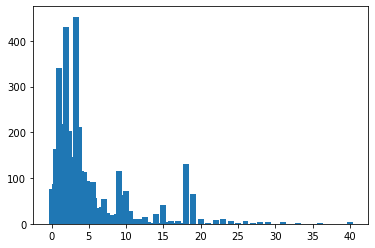

In [56]:
fig, ax = plt.subplots()
ax.bar(data['blue_KDA'].unique(),data['blue_KDA'].value_counts())

In [57]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_KDA,red_KDA
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,2.897653,2.908358
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,3.013887,3.070341
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,1.200000,1.200000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,2.000000,2.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,3.500000,3.500000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,40.000000,35.000000


In [58]:
#3217

In [59]:
pd.DataFrame(data["red_KDA"], columns=['red_KDA']).sample(n=15)

,red_KDA
3374,9.50
9509,3.00
2717,1.50
6097,0.40
1596,0.70
6099,1.00
2652,1.50
3853,3.50
4595,6.00
4126,1.18


In [60]:
y = data["blueWins"]

X = data.drop("blueWins",axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=0.12, n_estimators=400, random_state=42)

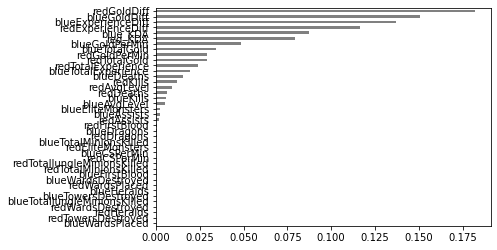

['redGoldDiff',
 'blueGoldDiff',
 'blueExperienceDiff',
 'redExperienceDiff',
 'blue_KDA',
 'red_KDA',
 'blueGoldPerMin',
 'blueTotalGold',
 'redGoldPerMin',
 'redTotalGold',
 'redTotalExperience',
 'blueTotalExperience',
 'blueDeaths',
 'redKills',
 'redAvgLevel',
 'redDeaths',
 'blueKills',
 'blueAvgLevel',
 'blueEliteMonsters',
 'blueAssists',
 'redAssists',
 'redFirstBlood',
 'blueDragons',
 'redDragons']

In [62]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
most_important_features = list(feature_importances.index[:24])
most_important_features

In [63]:
X_train = X_train[most_important_features]
X_test = X_test[most_important_features]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7903, 24) (1976, 24)
(7903,) (1976,)


[0.638663967611336, 0.6209514170040485, 0.6756072874493927, 0.6816801619433198, 0.6887651821862348, 0.6918016194331984, 0.7004048582995951, 0.6998987854251012, 0.7115384615384616, 0.7059716599190283, 0.7165991902834008, 0.7125506072874493, 0.7155870445344129, 0.7095141700404858, 0.7115384615384616, 0.7211538461538461, 0.7165991902834008, 0.7145748987854251, 0.7135627530364372, 0.7130566801619433, 0.7160931174089069, 0.7125506072874493, 0.7171052631578947, 0.7155870445344129, 0.715080971659919, 0.7095141700404858, 0.7069838056680162, 0.7145748987854251, 0.708502024291498]


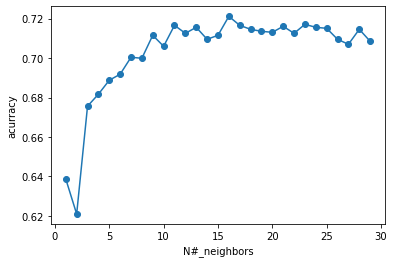

0.6887651821862348


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
scores = []
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred_knn))
print(scores)
plt.plot(k_range,scores,marker="o")
plt.ylabel("acurracy")
plt.xlabel("N#_neighbors")
plt.show()

knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

In [65]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth = 6, random_state = 42)
d_tree.fit(X_train, y_train)
y_pred_dtree = d_tree.predict(X_test)
print(d_tree.score(X_train, y_train))
print(accuracy_score(y_test, y_pred_dtree))


0.7459192711628495
0.7246963562753036


In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dtree))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dtree).ravel()
print("acurracy :", accuracy_score(y_test, y_pred_dtree)) #(tp+tn)/(tp+tn+fp+fn))
print("precision :",tp/(tp+fn))


[[713 270]
 [274 719]]
acurracy : 0.7246963562753036
precision : 0.7240684793554885


In [67]:
predictions = pd.DataFrame(y_pred_dtree,columns=["BlueWins"])
predictions

,BlueWins
0,0
1,1
2,1
3,1
4,0
...,...
1971,0
1972,1
1973,1
1974,0


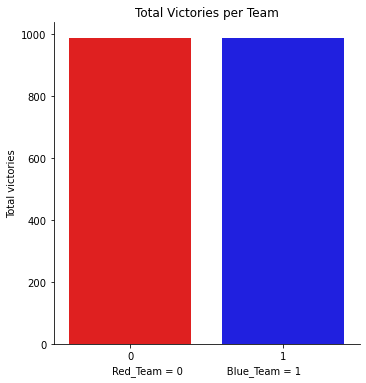

BlueWins
1    989
0    987
dtype: int64

In [68]:
ax = sns.catplot(x="BlueWins",data=predictions,palette=["r","b"],kind="count")
plt.ylabel("Total victories")
plt.xlabel("Red_Team = 0              Blue_Team = 1")
plt.title("Total Victories per Team")
plt.show()

predictions.value_counts("BlueWins")